# Abordagem 3
Neste caso são usados algoritmos não supervisionados para classificar o conjunto de treinamento.

In [1]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances
import sklearn.manifold.t_sne #import (_joint_probabilities,_kl_divergence)
from scipy import linalg



/home/renan/anaconda3/envs/env_voz/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
X_train_ = pd.read_csv("X_train.csv") 
X_test_ = pd.read_csv("X_test.csv") 
y_test_ = pd.read_csv("y_test.csv") 
X_test_.columns =['DIM_1', 'DIM_2', 'DIM_3', 'DIM_4', 'DIM_5', 'DIM_6', 'DIM_7', 
                 'DIM_8', 'DIM_9', 'DIM_10', 'DIM_11', 'DIM_12','DIM_13', 'DIM_14',
                 'DIM_15', 'DIM_16','DIM_17', 'DIM_18', 'DIM_19', 'DIM_20',]
y_test_.columns =['OUT']
X_train_.columns =['DIM_1', 'DIM_2', 'DIM_3', 'DIM_4', 'DIM_5', 'DIM_6', 'DIM_7', 
                 'DIM_8', 'DIM_9', 'DIM_10', 'DIM_11', 'DIM_12','DIM_13', 'DIM_14',
                 'DIM_15', 'DIM_16','DIM_17', 'DIM_18', 'DIM_19', 'DIM_20',]
#test_ = pd.concat([X_test, y_test], axis=1)
#test_.head()
#X_test.isnull().sum()
#X_test_ = X_test.dropna()
#train_test_split(X_test, test_size=0.05)
#train, test  = train_test_split(test_, test_size=0.05)
X_test_.head(10)

,DIM_1,DIM_2,DIM_3,DIM_4,DIM_5,DIM_6,DIM_7,DIM_8,DIM_9,DIM_10,DIM_11,DIM_12,DIM_13,DIM_14,DIM_15,DIM_16,DIM_17,DIM_18,DIM_19,DIM_20
0,0.481778,-2.690799,1.929163,2.194800,0.481778,-1.374999,-1.374999,-2.690799,2.194800,-2.650589,1.968976,2.987171,0.224900,-5.592626,0.481778,-5.644713,-5.592626,-3.261920,1.293436,0.056862
1,-0.758880,0.624947,3.096758,2.366358,-0.758880,0.614977,0.614977,0.624947,2.366358,-0.041634,-1.194561,0.320281,-1.095600,1.737322,-0.758880,1.703506,1.737322,-1.503375,-2.976826,-3.347693
2,1.547708,-0.824650,0.446411,1.946270,1.547708,2.577463,2.577463,-0.824650,1.946270,-0.986832,-1.923297,-0.587897,-1.630104,2.047893,1.547708,-1.639816,2.047893,-5.171651,0.599213,-0.236890
3,-1.593411,1.549793,3.488298,3.629761,-1.593411,0.998859,0.998859,1.549793,3.629761,-0.543969,-2.786350,-0.314272,-0.619047,2.110562,-1.593411,2.709332,2.110562,-2.212294,-3.313402,-2.805601
4,3.085533,-1.584111,1.057157,0.850008,3.085533,1.026912,1.026912,-1.584111,0.850008,0.642361,1.354507,0.484823,-1.107261,0.751787,3.085533,-4.033858,0.751787,-3.470866,0.811846,-2.874889
5,0.225221,-2.022480,2.492887,2.109219,0.225221,-0.113400,-0.113400,-2.022480,2.109219,-2.115855,0.806688,2.754259,-1.220831,-3.625507,0.225221,-4.048901,-3.625507,-4.361640,0.614697,-0.884426
6,1.685156,-1.888123,1.868993,3.164648,1.685156,0.819944,0.819944,-1.888123,3.164648,-1.777343,-0.063630,0.918951,-0.525844,-1.127290,1.685156,-4.288397,-1.127290,-5.055856,0.485159,-1.200129
7,0.520673,-1.462370,3.473858,2.355155,0.520673,0.524558,0.524558,-1.462370,2.355155,-0.945509,0.457348,2.104907,-2.036561,-0.670842,0.520673,-2.126162,-0.670842,-3.902823,-1.457445,-3.471213
8,-1.353294,1.534632,3.749267,2.671265,-1.353294,0.829007,0.829007,1.534632,2.671265,0.311106,-1.871476,0.243888,-1.184842,2.051934,-1.353294,2.585362,2.051934,-1.762989,-3.270411,-3.847704
9,0.580345,0.631322,0.713587,2.303129,0.580345,2.815299,2.815299,0.631322,2.303129,-0.772003,-3.148032,-0.912143,-1.194035,1.789704,0.580345,-0.792237,1.789704,-5.637653,1.119476,0.322888


In [3]:
from sklearn.impute import SimpleImputer
#X_train_ = X_train.dropna()
#print(X_train_.isnull().sum())
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(X_train_)

X_train_ = imp_mean.transform(X_train_)
#X_train_ = imp_mean.transform(X_train)

imp_mean = SimpleImputer( strategy='mean', missing_values=np.NaN)
imp_mean.fit(X_train_)
X_train_ = imp_mean.transform(X_train_)
#X_train_.shape

#X_train_

In [4]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sss.get_n_splits(X_test_, y_test_)

for train_index, test_index in sss.split(X_test_, y_test_):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_traintest = X_test_.iloc[train_index], X_test_.iloc[test_index]
    y_train, y_traintest = y_test_.iloc[train_index], y_test_.iloc[test_index]
#y_traintest.head(25)

In [5]:
#X_traintest.head(15)

## t-SNE

In [6]:
var_proj = TSNE(random_state=420).fit_transform(X_train_)
#var_proj
#print(var_proj[360,:])

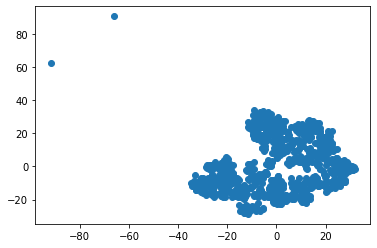

In [7]:
plt.scatter(var_proj[:,0], var_proj[:,1])
plt.show()

791
359


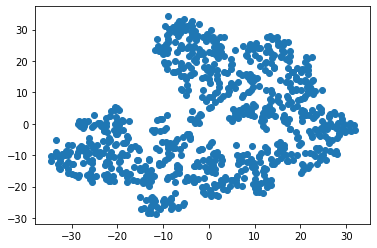

In [8]:
# Remove o maior
index1 = np.argmax( (np.sum((var_proj)**2, axis=1)) )
print(index1)
var_proj_ = np.delete(var_proj, index1, axis=0)
# Remove o segundo maior
index2 = np.argmax( (np.sum((var_proj_)**2, axis=1)) )
print(index2)
var_proj__ = np.delete(var_proj_, index2, axis=0)
# Plotar os Inliners
plt.scatter(var_proj__[:,0], var_proj__[:,1])
plt.show()
GMM_train = var_proj__



In [9]:
Treino = pd.DataFrame(X_train_)
Treino = Treino.drop([index1,index2], axis=0)
#Treino = Treino.drop([0, index2])
#print(index2)
Treino.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.899063,-0.480603,-1.670255,-2.282391,-0.899063,-1.076536,-1.076536,-0.480603,-2.282391,-0.472103,1.144313,1.061767,0.185259,-2.876827,-0.899063,-0.430605,-2.876827,1.694226,1.799027,2.771487
1,-2.323976,-3.348052,0.607788,0.425983,-2.323976,-0.387229,-0.387229,-3.348052,0.425983,-5.142310,0.164442,4.493414,-2.402873,-7.267695,-2.323976,-3.394197,-7.267695,-4.420329,2.168286,4.533912
2,0.437791,-0.362643,0.227631,-0.078306,0.437791,2.358362,2.358362,-0.362643,-0.078306,-0.445158,-1.464171,0.544595,-2.652340,0.837214,0.437791,-0.762070,0.837214,-4.422075,1.357079,0.332415
3,-1.550006,-0.540902,2.407810,2.205159,-1.550006,-1.106735,-1.106735,-0.540902,2.205159,-1.901841,0.062618,1.879379,0.171096,-3.137197,-1.550006,-0.883804,-3.137197,-1.191569,-1.025149,-0.440226
4,-0.853613,-0.348163,-0.619060,-0.374499,-0.853613,-0.337948,-0.337948,-0.348163,-0.374499,-0.996757,-0.130235,0.462139,0.036540,-1.388654,-0.853613,0.124742,-1.388654,0.287287,0.484055,1.810847


In [10]:
from sklearn.svm import OneClassSVM
OCSVM = OneClassSVM(nu=0.01, gamma=0.05)
#OCSVM.fit(var_proj)
inlier = OCSVM.fit_predict(var_proj)
#print(inlier)

## Gaussian Mixture Mode

In [11]:
from sklearn import mixture
# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(GMM_train)
y_gmm_pred = clf.predict(GMM_train)
np.sum(y_gmm_pred)

372

In [12]:
# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=2,
                                        covariance_type='full')
gmm_pred = dpgmm.fit(GMM_train)
y_dpgmm_pred = gmm_pred.predict(GMM_train)
np.sum(y_dpgmm_pred)

412

In [13]:
#confusion_matrix(y_train, np.abs(1-y_dpgmm_pred))
#confusion_matrix(y_traintest, y_dpgmm_pred)

In [14]:
#confusion_matrix(y_train, abs(1-y_gmm_pred))
#confusion_matrix(y_traintest, y_gmm_pred)

In [15]:
y_train_pred = gmm_pred.predict(GMM_train)
#y_train_pred

## Treinar um classificador stacking
Usando os rotulos calculados anteriormente.

In [16]:
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from collections import defaultdict
from sklearn import mixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier

base_models = [('random_forest', RandomForestClassifier(n_estimators=50)),
               ('svm', SVC()),
               ('knn', KNeighborsClassifier(n_neighbors=11))]
meta_model = LogisticRegressionCV()
stacking_model = StackingClassifier(estimators=base_models, 
                                    final_estimator=meta_model, 
                                    stack_method='predict',
                                    #passthrough=True, 
                                    cv=5,
                                    verbose=2
                                   )

In [17]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, verbose=1, n_jobs=3, error_score='raise')
    return scores
model_scores = defaultdict()

In [18]:
stacking_scores = evaluate_model(stacking_model, GMM_train, y_dpgmm_pred)
model_scores['stacking'] = stacking_scores

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   6 out of   6 | elapsed:    4.0s finished


In [19]:
stacking_model.fit(GMM_train, y_dpgmm_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


StackingClassifier(cv=5,
                   estimators=[('random_forest',
                                RandomForestClassifier(n_estimators=50)),
                               ('svm', SVC()),
                               ('knn', KNeighborsClassifier(n_neighbors=11))],
                   final_estimator=LogisticRegressionCV(),
                   stack_method='predict', verbose=2)

In [20]:
## Conferindo o teste
y_test_predict = stacking_model.predict( TSNE(random_state=420).fit_transform(X_test_))

In [21]:
confusion_matrix(y_test_, y_test_predict)

array([[90,  9],
       [16, 84]])